In [13]:
import pandas as pd

# Headers from the horse-colic.names.txt file
data_headers = ['had_surgery','age','hospital_number','rectal_temp','pulse',
    'resp_rate','temp_of_extremities','peripheral_pulse','mucous_membrane',
    'capillary_refill_time','pain','peristalsis','abdominal_distension',
    'nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH',
    'rectal_examination_feces','abdomen','packed_cell_volume','total_protein',
    'abdominocentesis_appearance','abdomcentesis_total_protein','outcome',
    'had_surgical_lesion','lesion_site','lesion_type','lesion_subtype',
    'lesion_specific_code','cp_data']

# Load the dataset
data = pd.read_csv('uci-horse-colic-data/horse-colic.data.csv',sep=' ',names=data_headers)

# The cp_data column contains no data, can delete this.
data = data.drop('cp_data',axis=1)

In [28]:
import numpy as np

data[data == '?'] = np.nan
data.astype(dtype=float)
data.head()

print('Dataset size: ', data.shape)

# First identify null or missing data
print(data.isnull().sum())
num_missing_data = data.isnull().any(axis=1).sum()
print('Total empty data points: ', num_missing_data)

Dataset size:  (299, 28)
had_surgery                      0
age                              0
hospital_number                  0
rectal_temp                     60
pulse                           24
resp_rate                       58
temp_of_extremities             56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          246
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          0
had_surgical_lesion              0
lesion_site                      0
lesion_type                      0
lesion_subtype                   0
lesion_specific_code          

In [29]:
missing_had_surgery = data[data.had_surgery.isnull()]
data = data.drop(missing_had_surgery.index)

# First identify null or missing data
print(data.isnull().sum())
num_missing_data = data.isnull().any(axis=1).sum()
print('Total empty data points: ', num_missing_data)

had_surgery                      0
age                              0
hospital_number                  0
rectal_temp                     60
pulse                           24
resp_rate                       58
temp_of_extremities             56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          246
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          0
had_surgical_lesion              0
lesion_site                      0
lesion_type                      0
lesion_subtype                   0
lesion_specific_code             0
dtype: int64
Total e

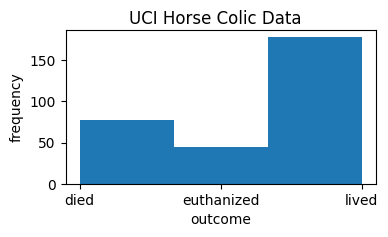

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the label column
label_column = 'outcome'
label = data[label_column]

# Create a figure for 2 subplots (2 rows, 1 col)
fig, ax = plt.subplots(1,1,figsize = (4,2))

# Plot a histogram of the label
ax.hist(label,bins=3)
ax.set_ylabel('frequency')
ax.set_xlabel(label_column)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['died','euthanized','lived'])

# Add title
fig.suptitle('UCI Horse Colic Data')

# Show the figure
plt.show()

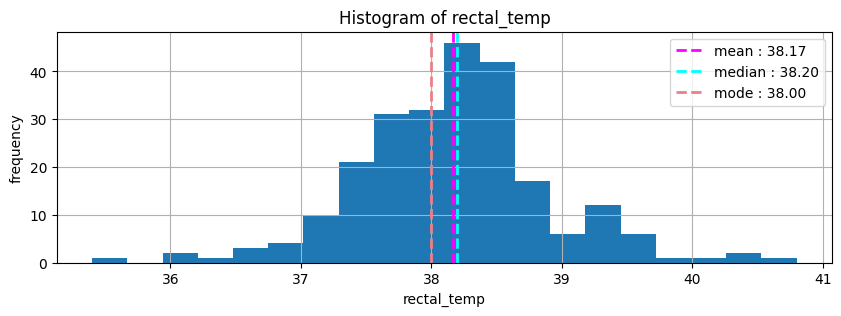

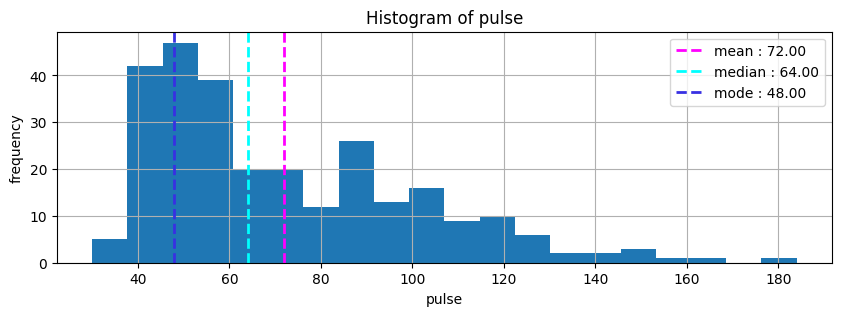

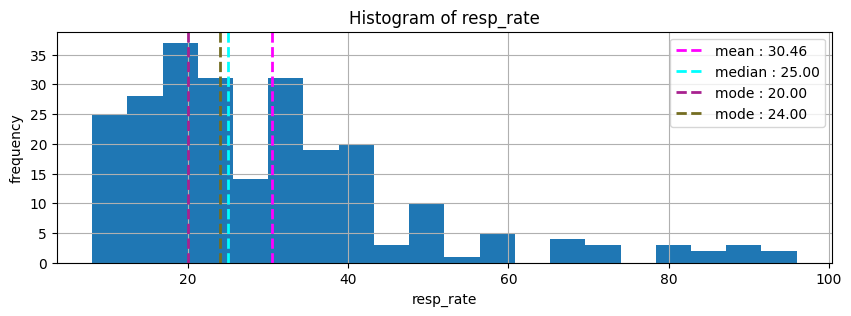

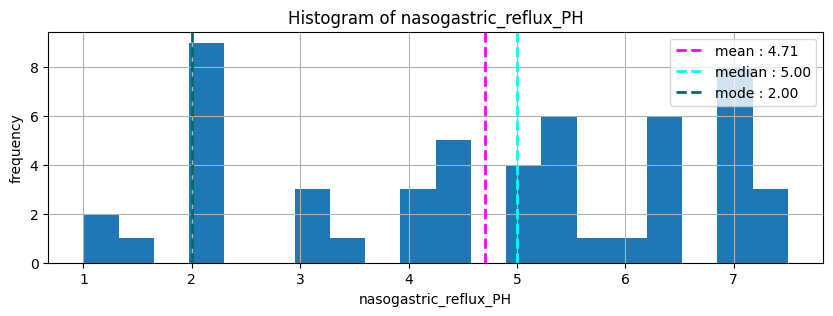

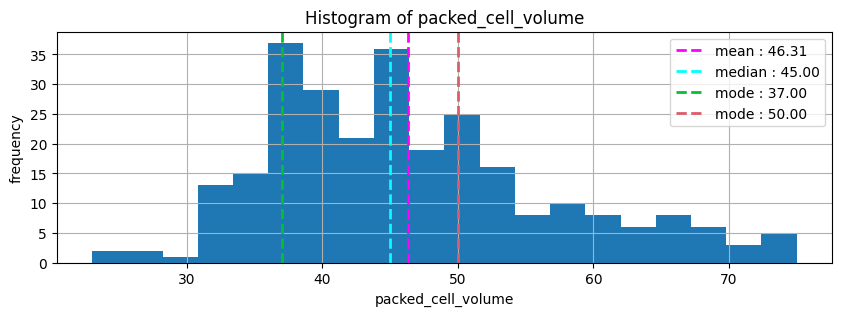

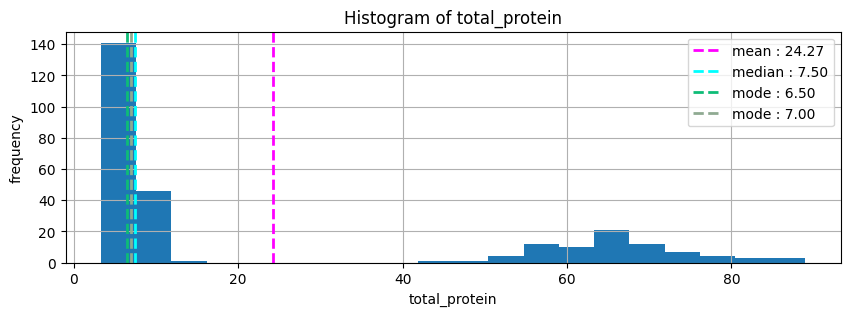

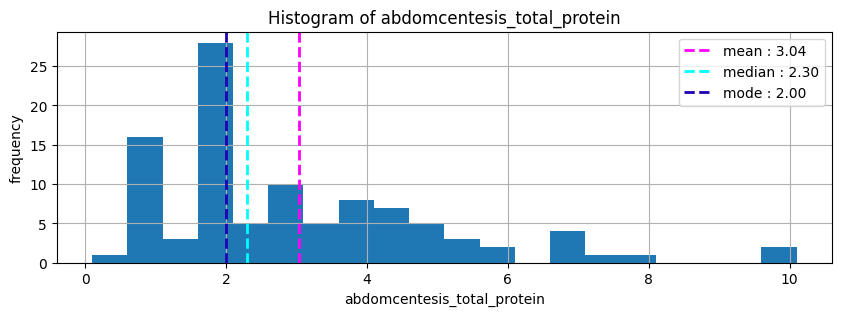

In [57]:
# Split features into numeric and categorical features
numeric_features = ['rectal_temp','pulse','resp_rate','nasogastric_reflux_PH',
                    'packed_cell_volume','total_protein','abdomcentesis_total_protein',]
categorical_features = ['had_surgery','age','hospital_number','temp_of_extremities',
                        'peripheral_pulse','mucous_membrane','capillary_refill_time',
                        'pain','peristalsis','abdominal_distension','nasogastric_tube',
                        'nasogastric_reflux','rectal_examination_feces','abdomen',
                        'abdominocentesis_appearance','had_surgical_lesion',
                        'lesion_site','lesion_type','lesion_subtype','lesion_specific_code']

for col in numeric_features:
    fig = plt.figure(figsize=(10,3))
    ax = fig.gca()
    feature = data[col].astype(float)
    feature.hist(bins=20,ax = ax)
    mean_feature = ax.axvline(feature.astype(float).mean(), color = 'magenta',linestyle = 'dashed', linewidth=2, label='mean : {:0.2f}'.format(feature.astype(float).mean()))
    median_feature = ax.axvline(feature.astype(float).median(), color = 'cyan',linestyle = 'dashed', linewidth=2, label='median : {:0.2f}'.format(feature.astype(float).median()))
    for mode in feature.astype(float).mode():
        rgb = np.random.rand(3,)
        mode_feature = ax.axvline(mode, linestyle = 'dashed', color=rgb, linewidth=2, label='mode : {:0.2f}'.format(mode))
    ax.set_title('Histogram of ' + col)
    ax.set_ylabel('frequency')
    ax.set_xlabel(col)
    plt.legend()
plt.show()